In [1]:
# !pwd

import plotly.io as pio
pio.renderers.default = "notebook"

In [1]:
import CRISP

# Simulation Utility

### Atomic Indices

In [3]:
from CRISP.simulation_utility.atomic_indices import run_atom_indices

help(run_atom_indices)


Help on function run_atom_indices in module CRISP.simulation_utility.atomic_indices:

run_atom_indices(file_path, output_folder, frame_index=0, cutoffs=None)
    Run atom index extraction and save results to files.
    
    Parameters
    ----------
    file_path : str
        Path to the ASE trajectory file
    output_folder : str
        Directory where output files will be saved
    frame_index : int, optional
        Index of the frame to analyze (default: 0)
    cutoffs : dict, optional
        Dictionary with atom symbol pairs as keys and cutoff distances as values
        
    Returns
    -------
    None
        Results are saved to the specified output folder:
        - lengths.npy: Dictionary of number of atoms per element
        - {symbol}_indices.npy: Numpy array of atom indices for each element
        - cutoff/{symbol1}-{symbol2}_cutoff.csv: CSV files with atom pairs within cutoff



In [4]:
from CRISP.simulation_utility.atomic_indices import run_atom_indices

file_path = "./wrapped_traj.traj"
output_folder = './indices_new/'

cutoffs = {
    ("O", "H"): 1.2,
    ("Si", "O"): 1.8,
    ("Al", "Si"): 3.2,
    ("O", "O"): 3.0
}

run_atom_indices(file_path, output_folder, frame_index=10, cutoffs=cutoffs)

Analyzing frame with index 10 (out of 21 frames)
Length of Si indices: 168
Length of Al indices: 24
Length of H indices: 120
Length of O indices: 432
Outputs saved.
Saved cutoff indices for O-H to ./indices_new/cutoff/O-H_cutoff.csv
Saved cutoff indices for Si-O to ./indices_new/cutoff/Si-O_cutoff.csv
Saved cutoff indices for Al-Si to ./indices_new/cutoff/Al-Si_cutoff.csv
Saved cutoff indices for O-O to ./indices_new/cutoff/O-O_cutoff.csv


### Atomic_traj_linemap

In [5]:
from CRISP.simulation_utility.atomic_traj_linemap import plot_atomic_trajectory
help(plot_atomic_trajectory)

Help on function plot_atomic_trajectory in module CRISP.simulation_utility.atomic_traj_linemap:

plot_atomic_trajectory(traj_path: str, selected_indices: List[int], output_path: str, frame_skip: int = 100, plot_title: str = None, show_plot: bool = False, atom_size_scale: float = 1.0)
    Create a 3D visualization of atom trajectories with all atom types displayed.
    
    Parameters
    ----------
    traj_path : str
        Path to the ASE trajectory file
    selected_indices : List[int]
        Atom indices to plot trajectories for
    output_path : str
        Path to save the generated HTML visualization
    frame_skip : int, optional
        Use every nth frame from the trajectory (default: 100)
    plot_title : str, optional
        Custom title for the plot (default: auto-generated)
    show_plot : bool, optional
        Whether to display the plot (default: False)
    atom_size_scale : float, optional
        Scale factor for atom sizes (default: 1.0)
        
    Returns
    

In [6]:
from CRISP.simulation_utility.atomic_traj_linemap import plot_atomic_trajectory

traj_file = "./wrapped_traj.traj"
output_dir = "./atomic_traj_linemap/o_atom_trajectory.html"
selected_atoms = [593]
frame_skip = 1  

fig = plot_atomic_trajectory(
    traj_path=traj_file, 
    selected_indices=selected_atoms,
    output_path=output_dir,
    frame_skip=frame_skip,
    plot_title="Oxygen Atom Movement Analysis",
    atom_size_scale=1.2,
    show_plot=False
)


Loading trajectory from ./wrapped_traj.traj (using every 1th frame)...
Loaded 21 frames from trajectory
Selected 1 atoms for trajectory plotting: [593]
Simulation box dimensions: [24.34499931 24.34499931 24.34499931] Å
Analyzing atom types in first frame (total atoms: 744, max index: 743)...
Found 4 atom types: Si, Al, O, H
Plot has been saved to ./atomic_traj_linemap/o_atom_trajectory.html


### Error Analysis

In [7]:
from CRISP.simulation_utility.error_analysis import autocorrelation_analysis, block_analysis

help(autocorrelation_analysis)

Help on function autocorrelation_analysis in module CRISP.simulation_utility.error_analysis:

autocorrelation_analysis(data, max_lag=None, threshold=0.05, plot_acf=False)
    Perform autocorrelation analysis to estimate statistical errors.
    
    Parameters
    ----------
    data : numpy.ndarray
        Input data (1D array or multi-dimensional array)
    max_lag : int, optional
        Maximum lag time to calculate autocorrelation for (default: min(1000, N/10))
    threshold : float, optional
        Correlation threshold below which data is considered uncorrelated (default: 0.05)
    plot_acf : bool, optional
        Whether to generate an autocorrelation plot (default: False)
        
    Returns
    -------
    dict
        Dictionary containing:
        - mean: Mean value of data
        - acf_err: Error estimate from autocorrelation analysis
        - std: Standard deviation of data
        - tau_int: Integrated autocorrelation time
        - optimal_lag: Optimal lag time wher

In [8]:
help(block_analysis)

Help on function block_analysis in module CRISP.simulation_utility.error_analysis:

block_analysis(data, convergence_tol=0.001, plot_blocks=False)
    Perform block averaging analysis to estimate statistical errors.
    
    Parameters
    ----------
    data : numpy.ndarray
        Input data array
    convergence_tol : float, optional
        Tolerance for determining convergence of standard error (default: 0.001)
    plot_blocks : bool, optional
        Whether to generate a block averaging plot (default: False)
        
    Returns
    -------
    dict
        Dictionary containing:
        - mean: Mean value of data
        - block_err: Error estimate from block averaging
        - std: Standard deviation of data
        - converged_blocks: Number of blocks at convergence
        
    Warns
    -----
    UserWarning
        If block averaging does not converge with the given tolerance



/home/saha/anaconda3/envs/molssi_best_practices/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/home/saha/anaconda3/envs/molssi_best_practices/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



{'mean': array([11.84336219,  6.56230374,  6.34512439]), 'acf_err': array([0.11042688, 0.0483816 , 0.06882431]), 'std': array([0.21002227, 0.09201757, 0.13089782]), 'tau_int': 69.11286151958006, 'optimal_lag': 109}


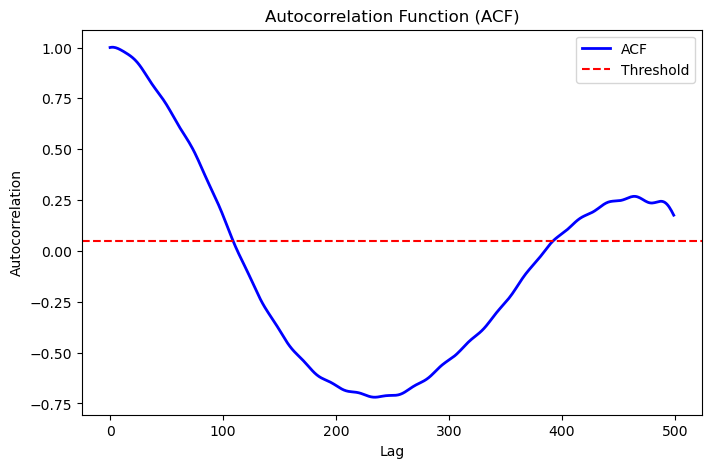

In [9]:
import numpy as np

data_positions = np.load("./error/positions.npy")
res_positions = autocorrelation_analysis(data_positions,plot_acf=True,max_lag=500)
print(res_positions)

{'mean': -3065.5796212000005, 'acf_err': 0.0054549762052233325, 'std': 0.6834300195116669, 'tau_int': 0.318542675191111, 'optimal_lag': 9}
{'mean': -3065.5796212000005, 'block_err': 0.02208793396091249, 'std': 0.6834300195116669, 'converged_blocks': 32}


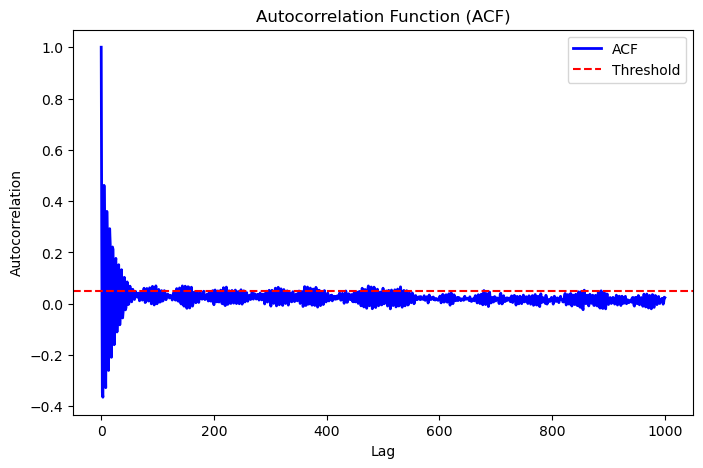

In [10]:
import numpy as np

data_energy = np.loadtxt("./error/md_20k.log", skiprows=1, usecols=2)
acf_error = autocorrelation_analysis(data_energy, plot_acf=True)
block_error = block_analysis(data_energy, convergence_tol=0.001, plot_blocks=False)

print(acf_error)
print(block_error)


### Interatomic Distances

In [11]:
from CRISP.simulation_utility.interatomic_distances import distance_calculation

help(distance_calculation)

Help on function distance_calculation in module CRISP.simulation_utility.interatomic_distances:

distance_calculation(traj_path: str, frame_skip: int, index_type: Union[str, List[Union[int, str]]] = 'all') -> Tuple[List[numpy.ndarray], List[numpy.ndarray]]
    Calculate distance matrices for multiple frames in a trajectory.
    
    Parameters
    ----------
    traj_path : str
        Path to the trajectory file
    frame_skip : int
        Read every nth frame (n=frame_skip)
    index_type : str, list, or None, optional
        Specification for which atoms to select for sub-matrix (default: "all")
        
    Returns
    -------
    Tuple[List[np.ndarray], List[np.ndarray]]
        Two lists containing:
        1. Full distance matrices for all frames
        2. Sub-matrices for specified atoms
        
    Raises
    ------
    ValueError
        If no frames were found in the trajectory



In [12]:
from CRISP.simulation_utility.interatomic_distances import save_distance_matrices

help(save_distance_matrices)

Help on function save_distance_matrices in module CRISP.simulation_utility.interatomic_distances:

save_distance_matrices(full_dms: List[numpy.ndarray], sub_dms: List[numpy.ndarray], index_type: Union[str, List[Union[int, str]]] = 'all', output_dir: str = 'distance_calculations') -> None
    Save distance matrices to pickle file.
    
    Parameters
    ----------
    full_dms : List[np.ndarray]
        List of full distance matrices
    sub_dms : List[np.ndarray]
        List of sub-matrices for specified atoms
    index_type : str, list, or None, optional
        Type of index selection used (default: "all")
    output_dir : str, optional
        Directory to save output file (default: "distance_calculations")
        
    Returns
    -------
    None
        Saves results to disk



In [13]:
from CRISP.simulation_utility.interatomic_distances import distance_calculation

traj_path = "./wrapped_traj.traj"
frame_skip = 10
index_type = ["O"]  

full_dms, sub_dms = distance_calculation(traj_path, frame_skip, index_type)

In [14]:
save_distance_matrices(full_dms, sub_dms, index_type, output_dir="distance_calculations_zeo")

Distance matrices saved in 'distance_calculations_zeo/distance_matrices.pkl'


### Subsampling

In [15]:
from CRISP.simulation_utility.subsampling import subsample
help(subsample)

Help on function subsample in module CRISP.simulation_utility.subsampling:

subsample(filename, n_samples=50, index_type='all', rcut=6.0, file_format=None, plot_subsample=False, skip=1, output_dir='subsampled_structures')
    Subsample a trajectory using Farthest Point Sampling with SOAP descriptors.
    
    Parameters
    ----------
    filename : str
        Path pattern to trajectory file(s); supports globbing
    n_samples : int, optional
        Number of frames to select (default: 50)
    index_type : str, list, or None, optional
        Specification for which atoms to use for SOAP calculation (default: "all")
    rcut : float, optional
        Cutoff radius for SOAP in Angstroms (default: 6.0)
    file_format : str, optional
        File format for ASE I/O (default: None, auto-detect)
    plot_subsample : bool, optional
        Whether to generate a plot of FPS distances (default: False)
    skip : int, optional
        Read every nth frame from the trajectory (default: 1)
   

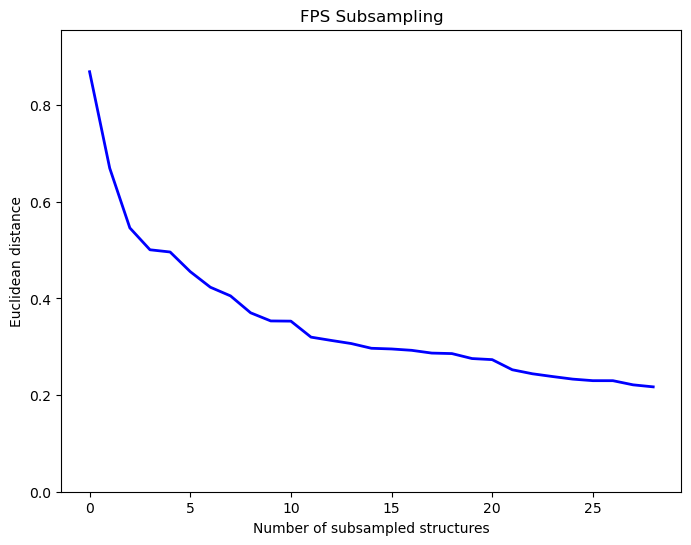

Saved convergence plot to ./Subsmapling/subsampled_convergence.png
Saved 30 subsampled structures to ./Subsmapling/subsample_local_minima.traj


In [16]:
from CRISP.simulation_utility.subsampling import subsample

all_frames = subsample(
    filename="./Subsmapling/local_minima.traj",
    n_samples=30,
    index_type="all",
    file_format="traj",
    skip=10,
    plot_subsample=True,
    output_dir="./Subsmapling"
)


# Data Analysis

### CN_Calculation

In [2]:
from CRISP.data_analysis.contact_coordination import coordination
help(coordination)

Help on function coordination in module CRISP.data_analysis.contact_coordination:

coordination(filename, target_atoms, ligand_atoms, custom_cutoffs, skip_frames=10, plot_cn=False, output_dir='./')
    Process a trajectory file to compute coordination numbers for each frame.
    
    Parameters
    ----------
    filename : str
        Path to the trajectory file
    target_atoms : Union[str, List[Union[int, str]]]
        Specifier for target atoms
    ligand_atoms : Union[str, List[Union[int, str]]]
        Specifier for ligand atoms
    custom_cutoffs : Dict[Tuple[str, str], float]
        Dictionary with custom cutoff distances
    skip_frames : int, optional
        Interval for skipping frames (default: 10)
    plot_cn : bool, optional
        Boolean to indicate if plots should be generated (default: False)
    output_dir : str, optional
        Directory where output files will be saved (default: "./")
        
    Returns
    -------
    List
        List containing coordinati

In [3]:
filename = "./wrapped_traj.traj"
target_atoms = "O"
bonded_atoms = ["O"]
custom_cutoffs = {('Al', 'O'): 3.5, ('O', 'O'): 2.5}
skip_frames = 10

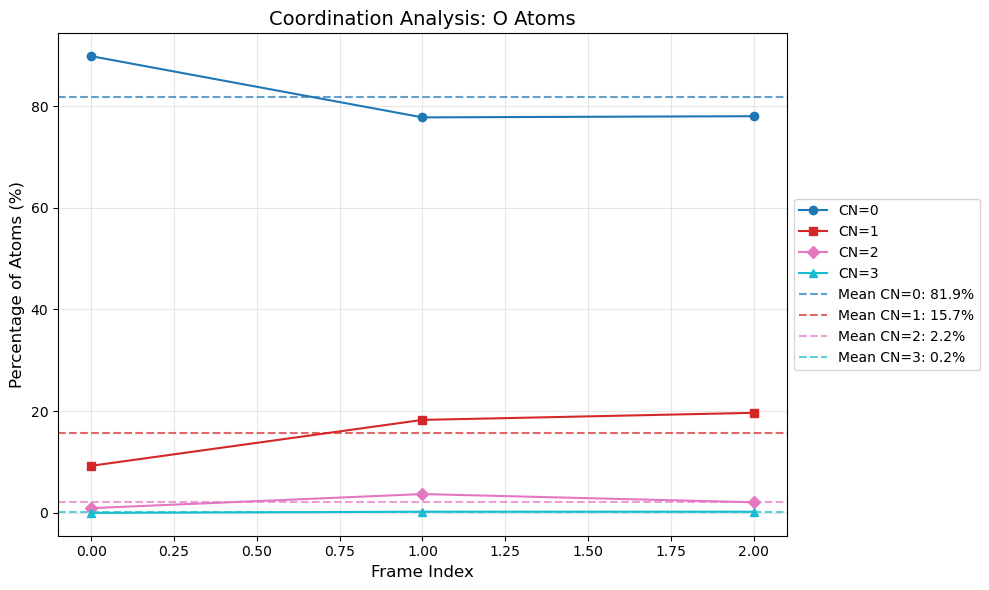

Interactive coordination distribution chart saved to ./CN_data/CN_distribution.html


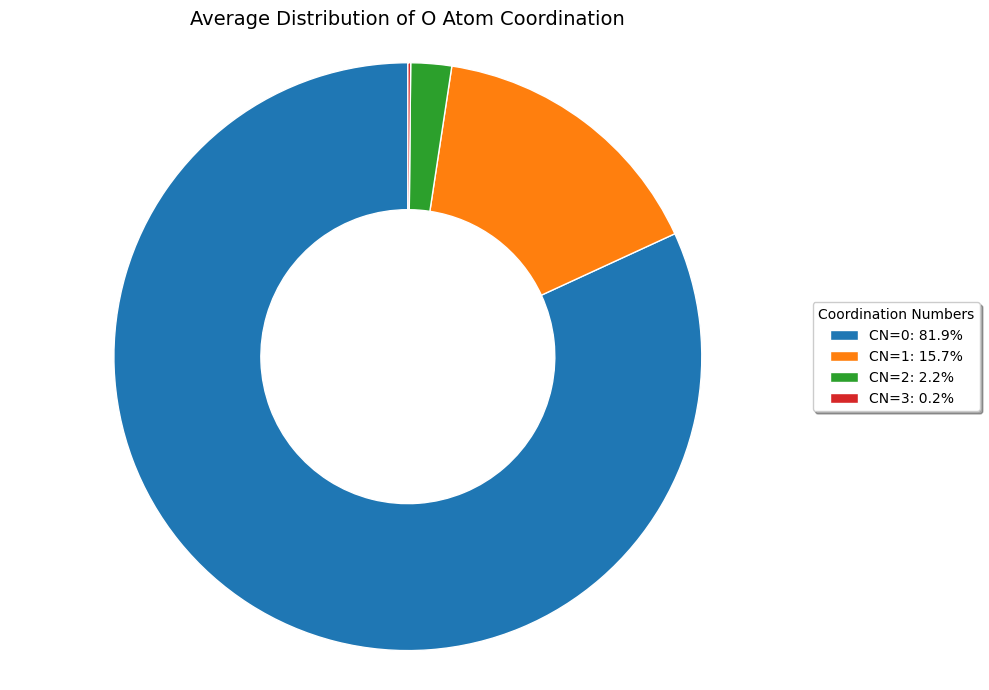

In [4]:
cn  = coordination(filename, 
             target_atoms, bonded_atoms, custom_cutoffs, 
             skip_frames=10, plot_cn=True, output_dir="./CN_data")

### Contacts

In [5]:
from CRISP.data_analysis.contact_coordination import contacts
help(contacts)

Help on function contacts in module CRISP.data_analysis.contact_coordination:

contacts(filename, target_atoms, contact_atoms, custom_cutoffs, skip_frames=10, plot_distance_matrix=False, plot_contacts=False, time_step=None, save_data=False, output_dir='./', mic=True)
    Processes a molecular trajectory file to compute contacts between target and contact atoms.
    
    Parameters
    ----------
    filename : str
        Path to the trajectory file
    target_atoms : Union[str, List[Union[int, str]]]
        Criteria for selecting target atoms
    contact_atoms : Union[str, List[Union[int, str]]]
        Criteria for selecting contact atoms
    custom_cutoffs : Dict[Tuple[str, str], float]
        Dictionary with custom cutoff values for specific atom pairs
    skip_frames : int, optional
        Number of frames to skip (default: 10)
    plot_distance_matrix : bool, optional
        Boolean flag to plot average distance heatmap (default: False)
    plot_contacts : bool, optional
    

In [6]:
filename = "./wrapped_traj.traj"
target_atoms = "O"
bonded_atoms = ["O"]
custom_cutoffs = {('Al', 'O'): 3.5, ('O', 'O'): 2.5}
skip_frames = 1

Interactive contact heatmap saved to ./Contacts_data/O_heatmap_contacts.html
Interactive contact analysis chart saved to ./Contacts_data/average_contact_analysis.html


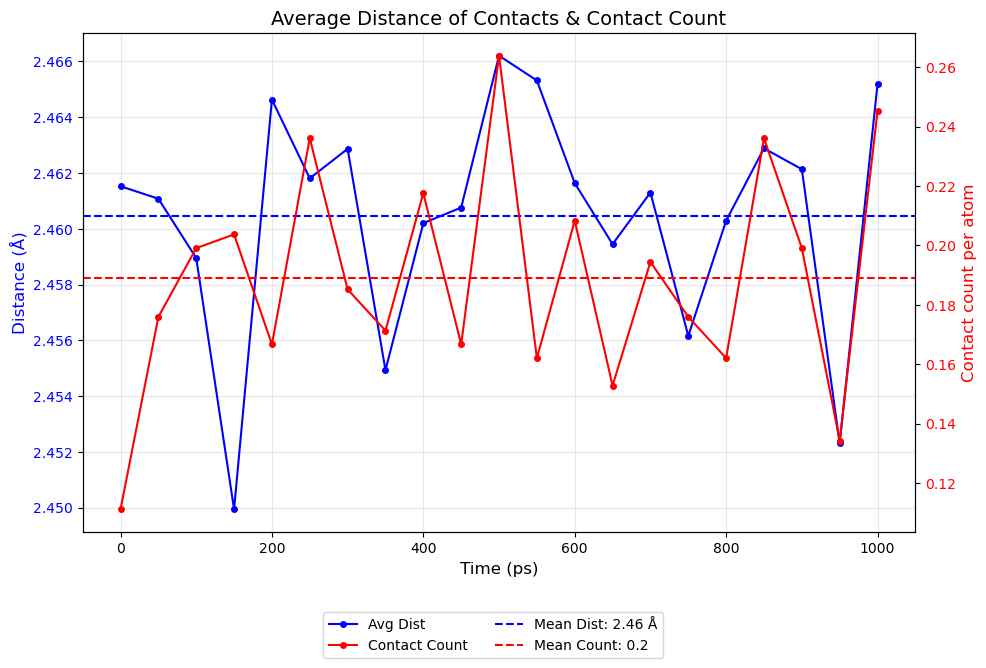

Static contact analysis chart saved to ./Contacts_data/average_contact_analysis.png


/home/saha/anaconda3/envs/molssi_best_practices/lib/python3.11/site-packages/numpy/core/_methods.py:173: RuntimeWarning:

invalid value encountered in subtract



Interactive distance heatmap saved to ./Contacts_data/O_heatmap_distance.html


In [7]:
sub_dm, cal_contacts = contacts(
    filename, target_atoms, bonded_atoms, custom_cutoffs,
    skip_frames=1,
    plot_distance_matrix=True,
    plot_contacts=True,
    time_step=50.0*1000,  # fs
    output_dir="./Contacts_data")

### Hydrogen_Bond_Calculation

In [8]:
from CRISP.data_analysis.h_bond import hydrogen_bonds
help(hydrogen_bonds)

Help on function hydrogen_bonds in module CRISP.data_analysis.h_bond:

hydrogen_bonds(filename, skip_frames=10, acceptor_atoms=['N', 'O', 'F'], angle_cutoff=120, h_bond_cutoff=2.4, bond_cutoff=1.6, mic=True, single_h_bond=False, output_dir='./', time_step=None, plot_count=False, plot_heatmap=False, plot_graph_frame=True, plot_graph_average=False, indices_array_path=None, graph_frame_index=0)
    Analyze hydrogen bonds in a molecular dynamics trajectory.
    
    Parameters
    ----------
    filename : str
        Path to trajectory file
    skip_frames : int, optional
        Number of frames to skip (default: 10)
    acceptor_atoms : List[str], optional
        List of element symbols that can be acceptors (default: ["N","O","F"])
    angle_cutoff : float, optional
        Minimum angle in degrees for hydrogen bond (default: 120)
    h_bond_cutoff : float, optional
        Maximum distance in Å for hydrogen bond (default: 2.4)
    bond_cutoff : float, optional
        Maximum distanc

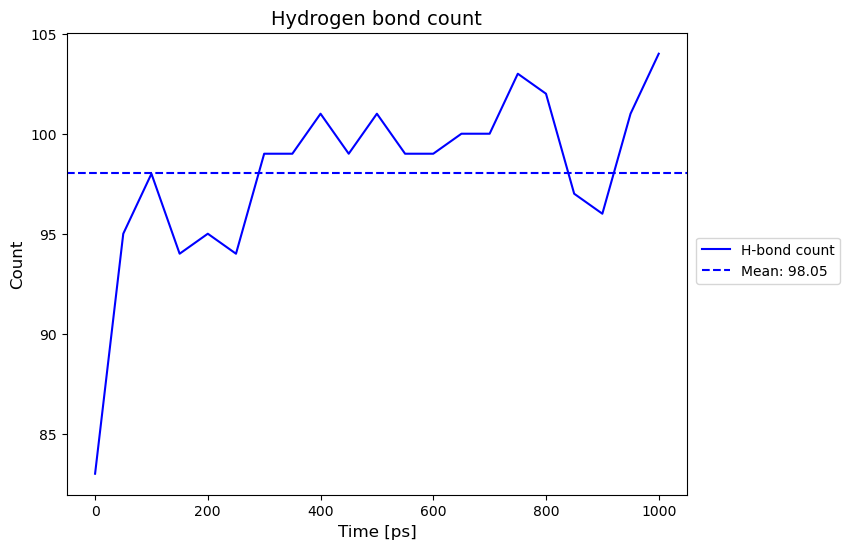

Hydrogen bond count plot saved to './H_Bond_Data/h_bond_count.png'


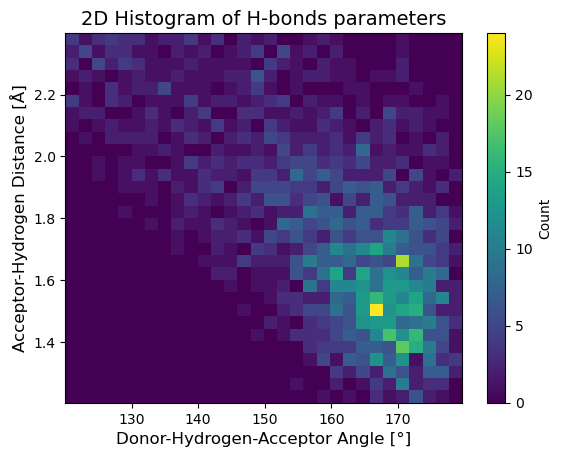

H-bond structure 2D histogram saved to './H_Bond_Data/h_bond_structure.png'
Generated and saved 196 unique donor/acceptor atom indices to ./H_Bond_Data/donor_acceptor_indices.npy
Generating hydrogen bond network visualizations for frame 10...
Interactive correlation matrix saved as './H_Bond_Data/hbond_correlation_matrix_frame_10.html'
Figure saved as './H_Bond_Data/hbond_network_frame_10.html'
Generating average hydrogen bond network visualization...
Interactive correlation matrix saved as './H_Bond_Data/hbond_correlation_matrix_average.html'
Figure saved as './H_Bond_Data/hbond_network_average.html'


In [9]:
from CRISP.data_analysis.h_bond import hydrogen_bonds

h_bonds_both_plots = hydrogen_bonds(
    filename="./wrapped_traj.traj",
    skip_frames=1,
    acceptor_atoms=["O"],
    angle_cutoff=120,
    mic=True,
    output_dir = "./H_Bond_Data",
    time_step=50*1000,
    plot_count=True,
    plot_heatmap=True,
    plot_graph_frame=True,        # Generate frame-specific plot
    plot_graph_average=True,      # Generate average plot
    graph_frame_index=10          # Use frame 10 instead of default 0
)

### Radial_Distribution_Function

In [10]:
from CRISP.data_analysis.prdf import analyze_rdf
help(analyze_rdf)

Help on function analyze_rdf in module CRISP.data_analysis.prdf:

analyze_rdf(use_prdf: bool, rmax: float, traj_path: str, nbins: int = 100, frame_skip: int = 10, output_filename: Optional[str] = None, atomic_indices: Optional[Tuple[List[int], List[int]]] = None, output_dir: str = 'custom_ase', plot_prdf: bool = False)
    Analyze trajectory and calculate radial distribution functions.
    
    Parameters
    ----------
    use_prdf : bool
        Whether to calculate partial RDF (True) or total RDF (False)
    rmax : float
        Maximum radius for RDF calculation
    traj_path : str
        Path to trajectory file
    nbins : int, optional
        Number of bins for histogram (default: 100)
    frame_skip : int, optional
        Number of frames to skip between analyses (default: 10)
    output_filename : Optional[str], optional
        Custom filename for output (default: None, auto-generated)
    atomic_indices : Optional[Tuple[List[int], List[int]]], optional
        Tuple of (re

Data saved in 'custom_ase/rdf_total.pkl'


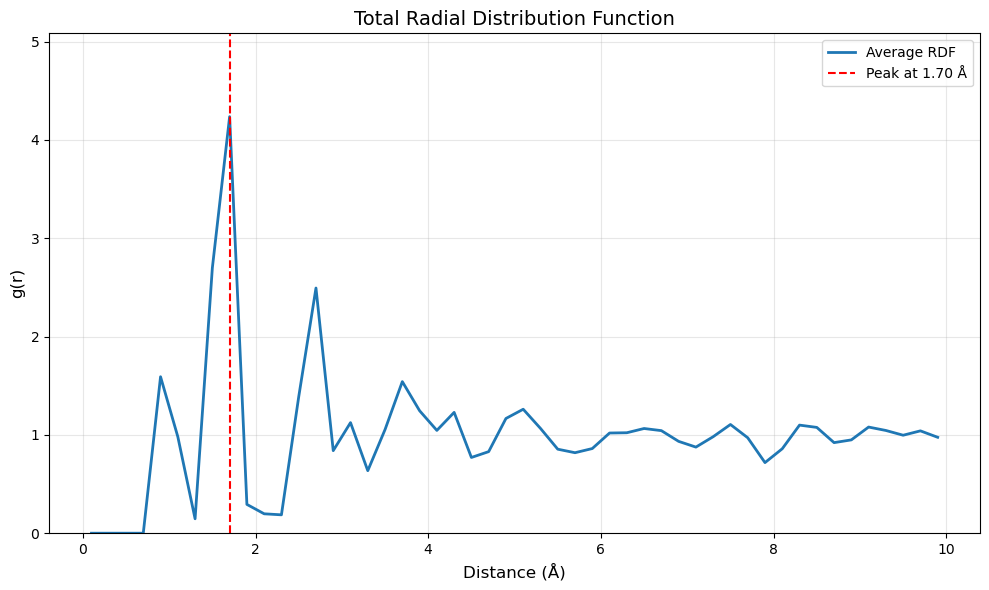

Static plot saved in 'custom_ase/rdf_total_plot.png'
Interactive animation saved to 'custom_ase/rdf_total_animation.html'
GIF animation saved to 'custom_ase/rdf_total_animation.gif'
Animation saved in 'custom_ase/rdf_total_animation.gif'


In [11]:
traj_file = "./wrapped_traj.traj"
rmax = 10.0
nbins = 50
frame_skip = 1
output_dir = "custom_ase"
output_filename = None  # or specify a filename like "output.pkl"
use_prdf = False  # Set to True if you want to calculate partial RDF
atomic_indices = None  # Set to a tuple of lists if use_prdf is True, e.g., ([10, 1])

data_rdf = analyze_rdf(
    use_prdf=use_prdf,
    rmax=rmax,
    traj_path=traj_file,
    nbins=nbins,
    frame_skip=frame_skip,
    output_filename=output_filename,
    atomic_indices=atomic_indices,
    output_dir=output_dir,
    plot_prdf=True
)

In [12]:
import pickle
import numpy as np

output_path = "./custom_ase/rdf_total.pkl"

with open(output_path, "rb") as f:
    data = pickle.load(f)

print("Data keys:", list(data.keys()))

x_data = data['x_data']
y_data_all = data['y_data_all']

print("x_data shape (bin centers):", x_data.shape)
print("Number of bins:", len(x_data))

print("y_data_all type:", type(y_data_all))
print("Number of frames:", len(y_data_all))


Data keys: ['x_data', 'y_data_all']
x_data shape (bin centers): (50,)
Number of bins: 50
y_data_all type: <class 'list'>
Number of frames: 21


### Mean Square Displacement

In [20]:
from CRISP.data_analysis.msd import calculate_save_msd
help(calculate_save_msd)

Help on function calculate_save_msd in module CRISP.data_analysis.msd:

calculate_save_msd(traj_file, timestep_value, indices_file=None, ignore_n_images=0, output_file='msd_results.csv', frame_skip=1)
    Calculate MSD data and save to CSV file.
    
    Parameters
    ----------
    traj_file : str
        Path to the ASE trajectory file
    timestep_value : float
        Simulation timestep in ASE time units
    indices_file : str, optional
        Path to file containing atom indices (default: None)
    ignore_n_images : int, optional
        Number of initial images to ignore (default: 0)
    output_file : str, optional
        Output CSV file path (default: "msd_results.csv")
    frame_skip : int, optional
        Number of frames to skip between samples (default: 1)
    
    Returns
    -------
    tuple
        (msd_values, msd_times) - MSD values and corresponding time values



In [21]:
from CRISP.data_analysis.msd import analyze_from_csv
help(analyze_from_csv)

Help on function analyze_from_csv in module CRISP.data_analysis.msd:

analyze_from_csv(csv_file='msd_results.csv', fit_start=None, fit_end=None, with_intercept=False, plot_msd=False)
    Analyze MSD data from a CSV file.
    
    Parameters
    ----------
    csv_file : str, optional
        Path to the CSV file containing MSD data (default: "msd_results.csv")
    fit_start : int, optional
        Start index for fitting (default: None)
    fit_end : int, optional
        End index for fitting (default: None)
    with_intercept : bool, optional
        Whether to fit with intercept (default: False)
    plot_msd : bool, optional
        Whether to plot MSD vs time (default: False)
    
    Returns
    -------
    tuple
        (D, error) where D is the diffusion coefficient in cm²/s and error is the statistical error



In [22]:
from CRISP.data_analysis.msd import calculate_save_msd

traj_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj"
indices_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy"
timestep = 50.0 * 100

msd_values, msd_times = calculate_save_msd(
    traj_file=traj_file,
    timestep_value=timestep,
    indices_file=indices_file,
    output_file="msd_results.csv",
    frame_skip=100
)

Loaded full trajectory with 22000 frames
Using 220 frames after skipping every 100 frames
Loaded 72 atom indices
Using adjusted timestep: 50902.52835578362 * fs (original: 50902.52835578362 * fs)
Calculating MSD...
MSD data has been saved to msd_results.csv


Total data points in file: 220
Loaded MSD data from msd_results.csv


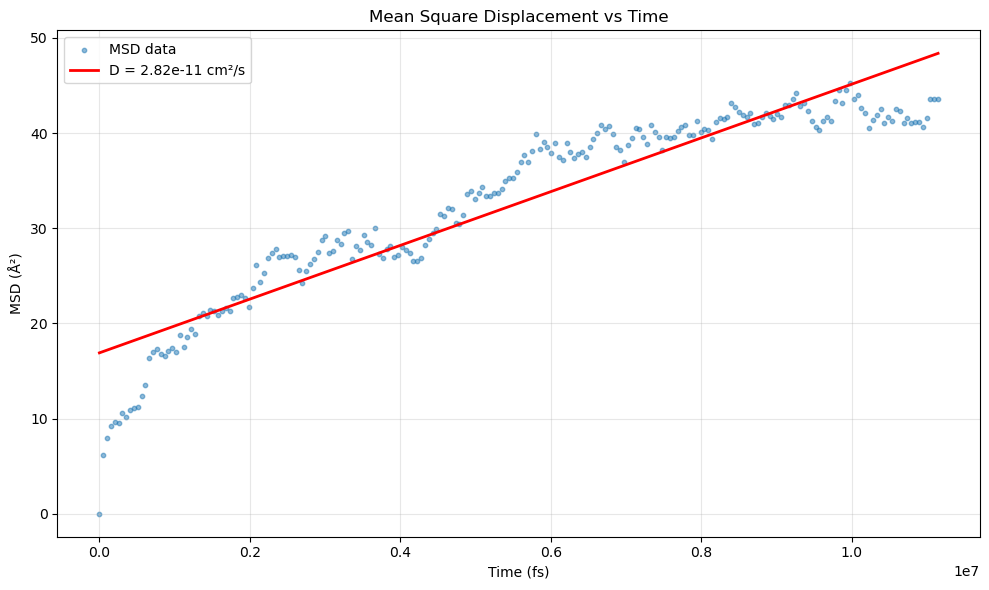

Diffusion Coefficient: 2.82e-11 cm²/s
Error: 7.22e-13 cm²/s


In [23]:
from CRISP.data_analysis.msd import analyze_from_csv
import pandas as pd

df = pd.read_csv("msd_results.csv")
print(f"Total data points in file: {len(df)}")

# Then use a valid fit_end value
D, error = analyze_from_csv(
    csv_file="msd_results.csv",
    fit_start=0,
    fit_end=len(df),  
    with_intercept=True,
    plot_msd=True
)

### Clustering

In [24]:
from CRISP.data_analysis.clustering import StructureAnalyzer
help(StructureAnalyzer)

Help on class StructureAnalyzer in module CRISP.data_analysis.clustering:

class StructureAnalyzer(builtins.object)
 |  StructureAnalyzer(traj_file, atom_indices, threshold, min_samples, metric='precomputed', custom_frame_index=None)
 |  
 |  Analyze atomic structures using DBSCAN clustering algorithm.
 |  
 |  Parameters
 |  ----------
 |  traj_file : str
 |      Path to trajectory file
 |  atom_indices : np.ndarray
 |      Array containing indices of atoms to analyze
 |  threshold : float
 |      DBSCAN eps parameter (distance threshold)
 |  min_samples : int
 |      DBSCAN min_samples parameter
 |  metric : str, optional
 |      Distance metric to use (default: 'precomputed')
 |  custom_frame_index : int, optional
 |      Specific frame to analyze (default: None, uses last frame)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, traj_file, atom_indices, threshold, min_samples, metric='precomputed', custom_frame_index=None)
 |      Initialize self.  See help(type(self)) for accu

In [18]:
from CRISP.data_analysis.clustering import analyze_trajectory
help(analyze_trajectory)

Help on function analyze_trajectory in module CRISP.data_analysis.clustering:

analyze_trajectory(trajectory_path, atom_indices_path, threshold, min_samples, skip_frames=10, output_dir='clustering_results', save_html_visualizations=True)
    Analyze an entire trajectory with DBSCAN clustering.
    
    Parameters
    ----------
    trajectory_path : str
        Path to trajectory file
    atom_indices_path : str
        Path to numpy array file containing atom indices
    threshold : float
        DBSCAN eps parameter (distance threshold)
    min_samples : int
        DBSCAN min_samples parameter
    skip_frames : int, optional
        Number of frames to skip (default: 10)
    output_dir : str, optional
        Directory to save output files (default: "clustering_results")
    save_html_visualizations : bool, optional
        Whether to save HTML visualizations for first and last frames (default: True)
        
    Returns
    -------
    list
        List of analysis results for each

#### Frame 

In [17]:
from CRISP.data_analysis.clustering import StructureAnalyzer
import numpy as np
import os

traj_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj"
indices_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy"
threshold = 3.0
min_samples = 3
output_dir = "SiAl15_clustering"

os.makedirs(output_dir, exist_ok=True)

atom_indices = np.load(indices_file)

analyzer = StructureAnalyzer(
    traj_file=traj_file,
    atom_indices=atom_indices,
    threshold=threshold,
    min_samples=min_samples,
    metric='precomputed',
    custom_frame_index=-1  
)

results = analyzer.analyze_structure(output_dir=output_dir)



Saving results to directory: SiAl15_clustering
3D visualization saved to SiAl15_clustering/nvt_clusters.html

Number of Clusters: 10
Number of Outliers: 9
Silhouette Score: 0.2932
Average Cluster Size: 6.30
Cluster Information:
  Cluster 0: 14 points
  Cluster 1: 9 points
  Cluster 2: 4 points
  Cluster 3: 7 points
  Cluster 4: 10 points
  Cluster 5: 5 points
  Cluster 6: 3 points
  Cluster 7: 4 points
  Cluster 8: 4 points
  Cluster 9: 3 points
Detailed frame data saved to: SiAl15_clustering/frame_data.txt
Full analysis data saved to: SiAl15_clustering/single_frame_analysis.pkl


#### Trajectory

Per-frame data saved to: SiAl15_traj_analysis/nvt_frame_data.txt
3D visualization saved to SiAl15_traj_analysis/nvt_first_frame_clusters.html
3D visualization saved to SiAl15_traj_analysis/nvt_last_frame_clusters.html
Analysis results saved to directory: SiAl15_traj_analysis


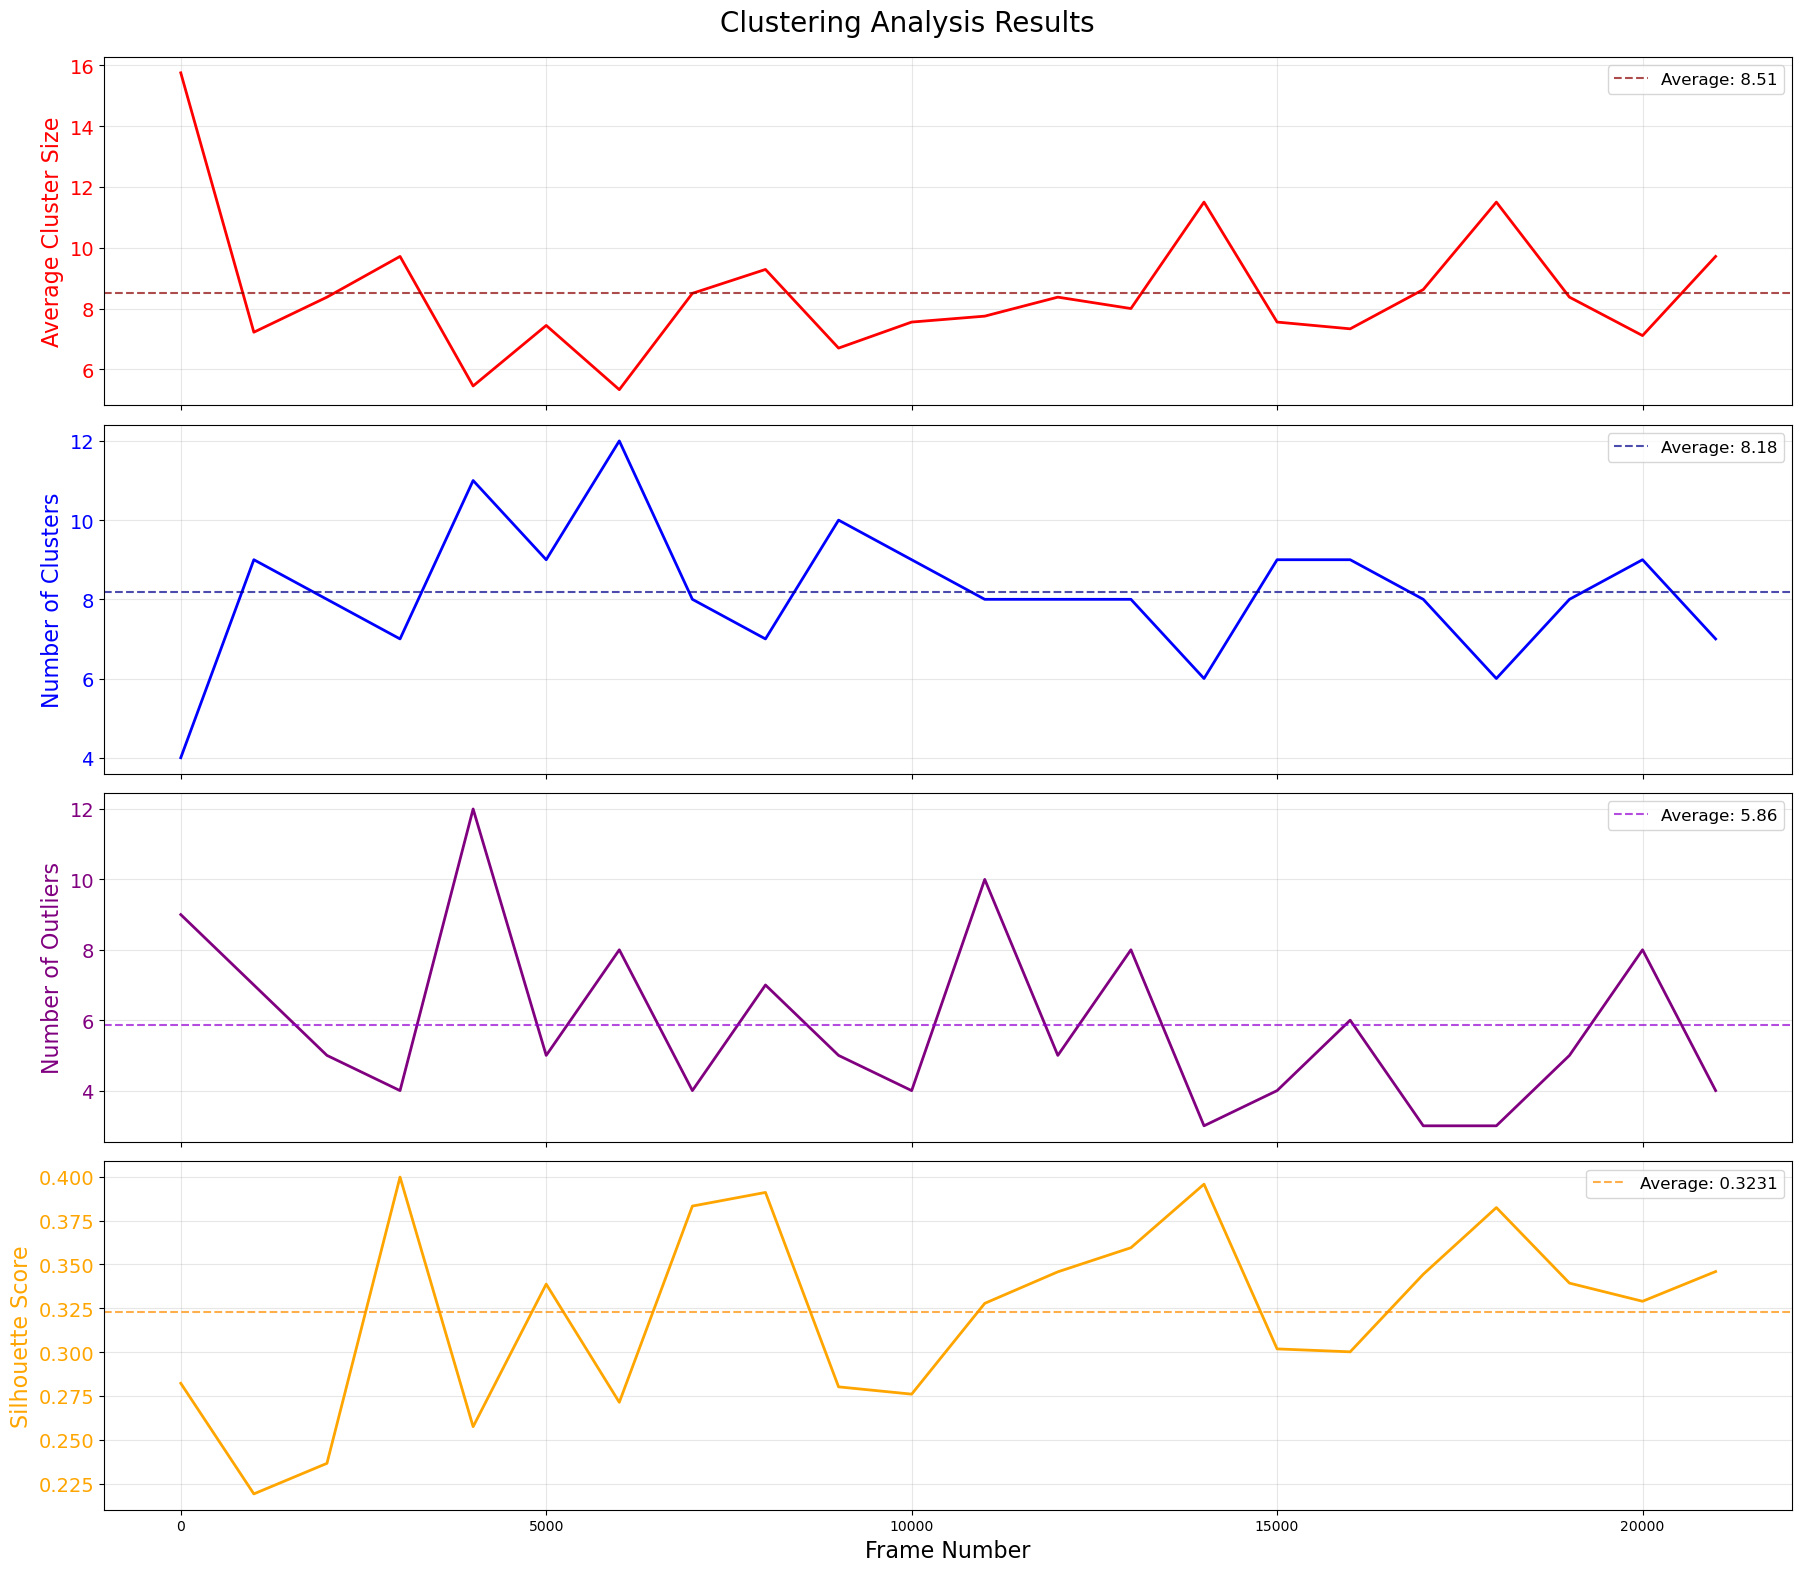

Analysis plot saved to: SiAl15_traj_analysis/SiAl15_traj_clusters_plot.png


In [16]:
from CRISP.data_analysis.clustering import analyze_trajectory, save_analysis_results, plot_analysis_results
import os
import numpy as np

traj_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/nvt.traj"
indices_file = "../../../../BATH/System_Analysis_01ns/system_analysis/SiAl15/indices_needed/ex_fram_ox.npy"
threshold = 3.0
min_samples = 3
skip_frames = 1000  
output_dir = "SiAl15_traj_analysis"
output_prefix = "SiAl15_traj_clusters"

os.makedirs(output_dir, exist_ok=True)

analysis_results = analyze_trajectory(
    trajectory_path=traj_file,
    atom_indices_path=indices_file,
    threshold=threshold,
    min_samples=min_samples,
    skip_frames=skip_frames,
    output_dir=output_dir,
    save_html_visualizations=True  # Save HTML visualizations of first and last frames
)

pickle_file = save_analysis_results(
    analysis_results=analysis_results,
    output_dir=output_dir,
    output_prefix=output_prefix
)

plot_analysis_results(pickle_file, output_dir=output_dir)